# 대푯값 계산 
### 표본평균. 표본중앙값. 최빈구간 

In [19]:
np.random.seed(0) #난수 고정 
x = np.random.normal(size=21) # 난수 생성 
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982])

In [20]:
print(f'표본평균 : {np.mean(x)}, 표본중앙값 : {np.median(x)}')

표본평균 : 0.4206524782418389, 표본중앙값 : 0.4001572083672233


In [36]:
bins = np.linspace(-4,4,17)
ns, _ = np.histogram(x, bins=bins)
print(ns) # 구간에 포함된 데이터 수
print(_) # 구간 구간 범위 표시해줌

[0 0 1 0 0 0 2 3 7 3 2 2 1 0 0 0]
[-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5
  3.   3.5  4. ]


In [52]:
m_bin = np.argmax(ns)
m_bin # 데이터 수 가장 많은 구간의 데이터 수의 인덱스 (???) == 7의 인덱스 

8

In [58]:
list7 =  [i for i in x if i >= 0 and i <= 0.5]
len(list7)

7

In [63]:
np.mean(list7)

0.3095827942471279

In [62]:
np.median(list7)

0.33367432737426683

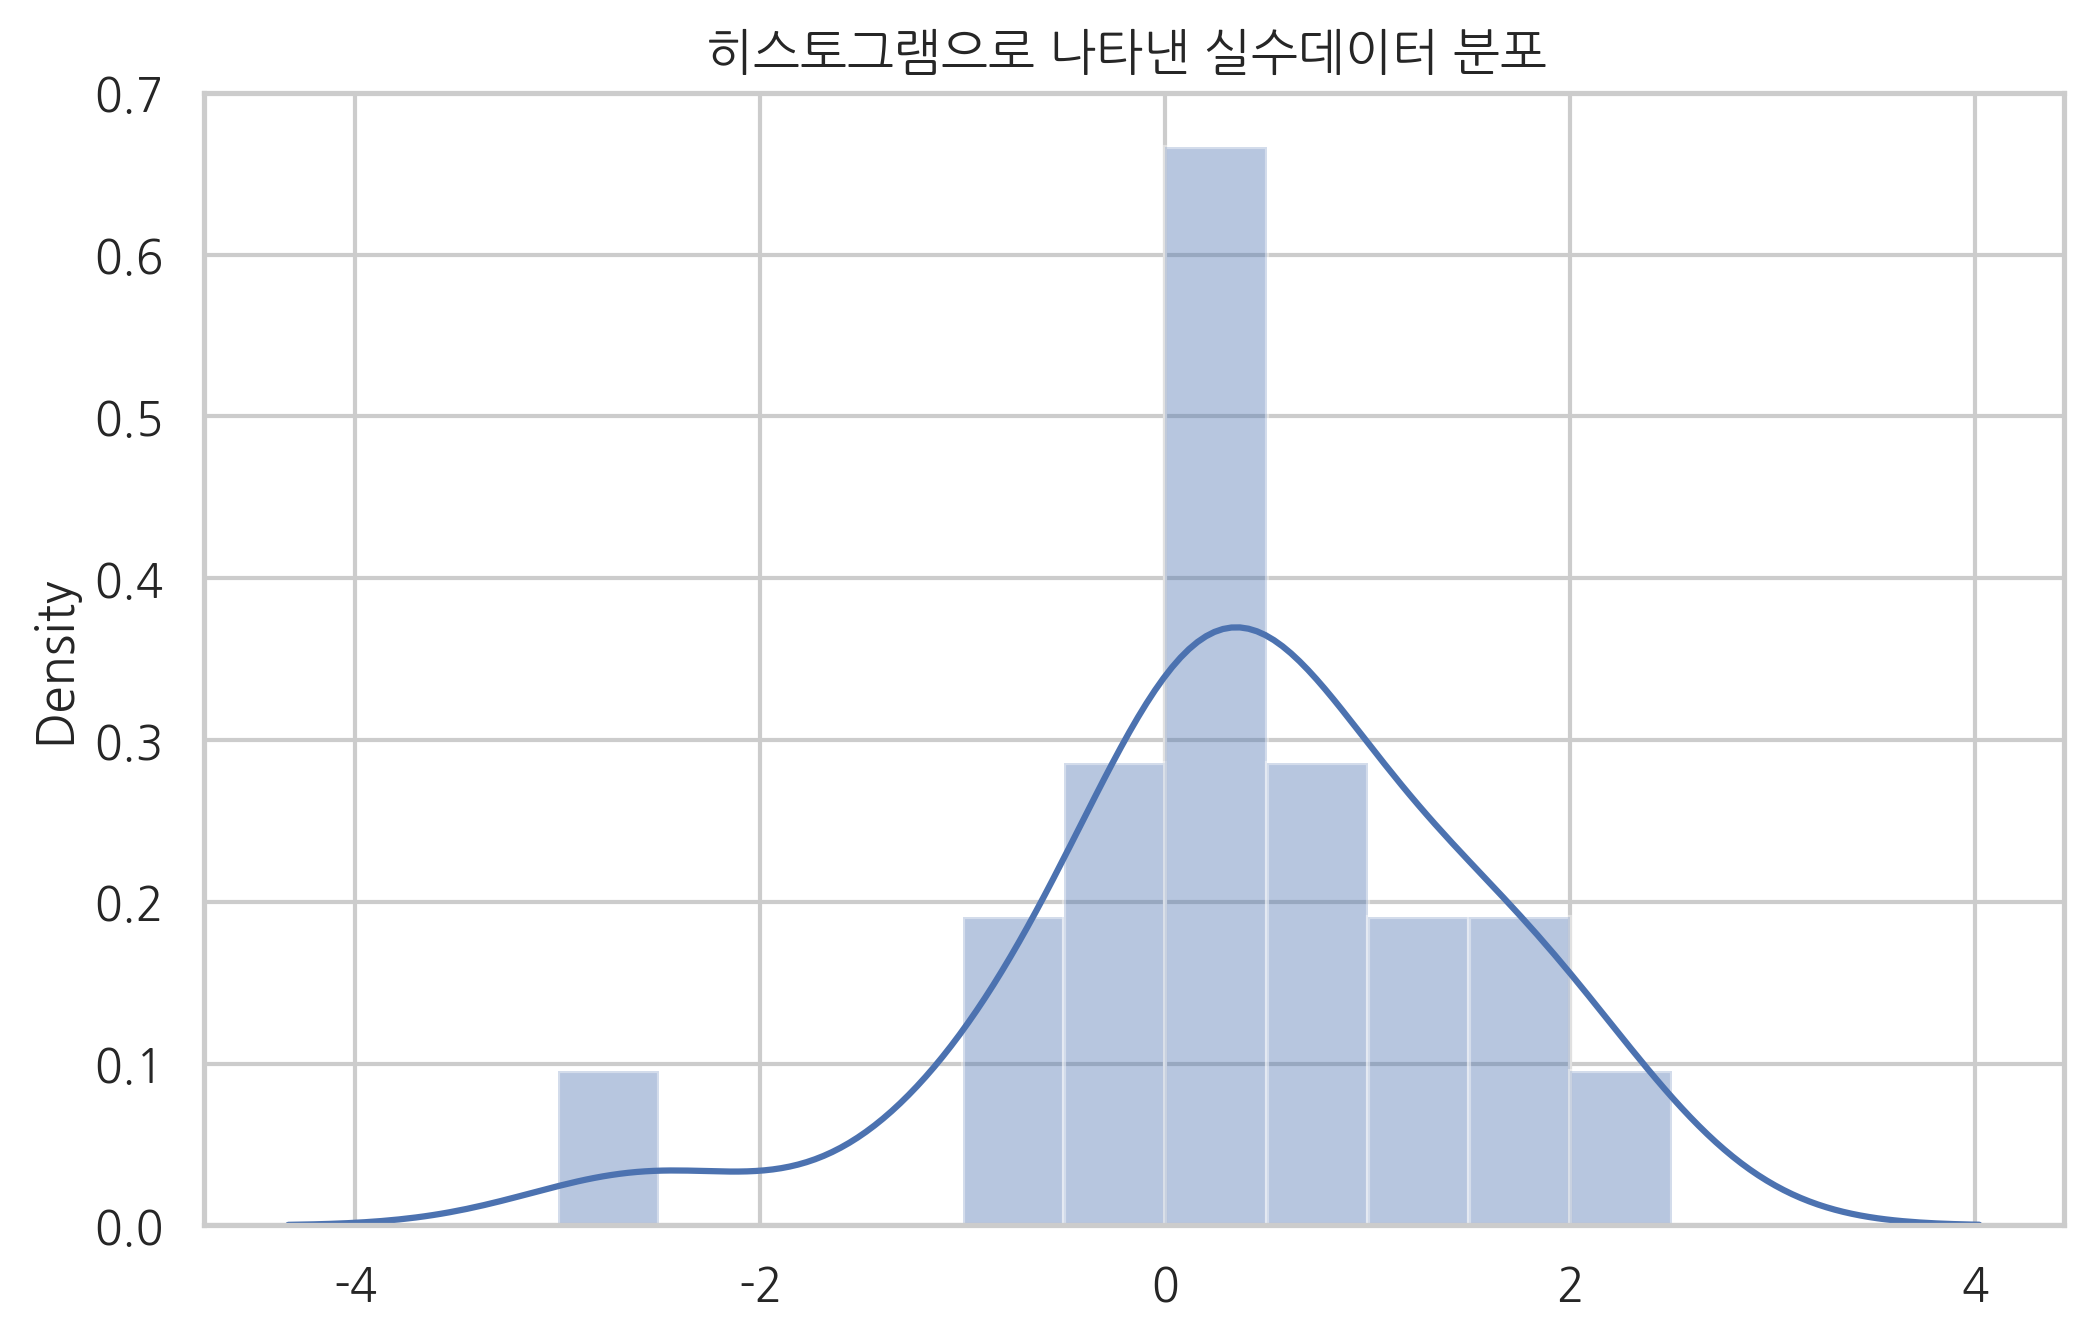

In [73]:
sns.distplot(x, bins=bins)
plt.title('히스토그램으로 나타낸 실수데이터 분포 ')

plt.show()

# 히스토그램으로 데이터 값(표본) 빈도 살피기 

In [159]:
#7.1.1 연습문제 
from pandas import DataFrame
from sklearn.datasets import load_iris
iris = load_iris()
df = DataFrame(iris.data, columns=iris.feature_names)

sy = pd.Series(iris.target, dtype='category')
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [101]:
#1. 
pl = df[['petal length (cm)']]
pl

,petal length (cm)
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4
...,...
145,5.2
146,5.0
147,5.2
148,5.4


In [130]:
print(f'꽃잎 길이 최솟값 : {min(pl.values)},\n꽃잎 길이 최댓값 : {max(pl.values)}')

꽃잎 길이 최솟값 : [1.],
꽃잎 길이 최댓값 : [6.9]


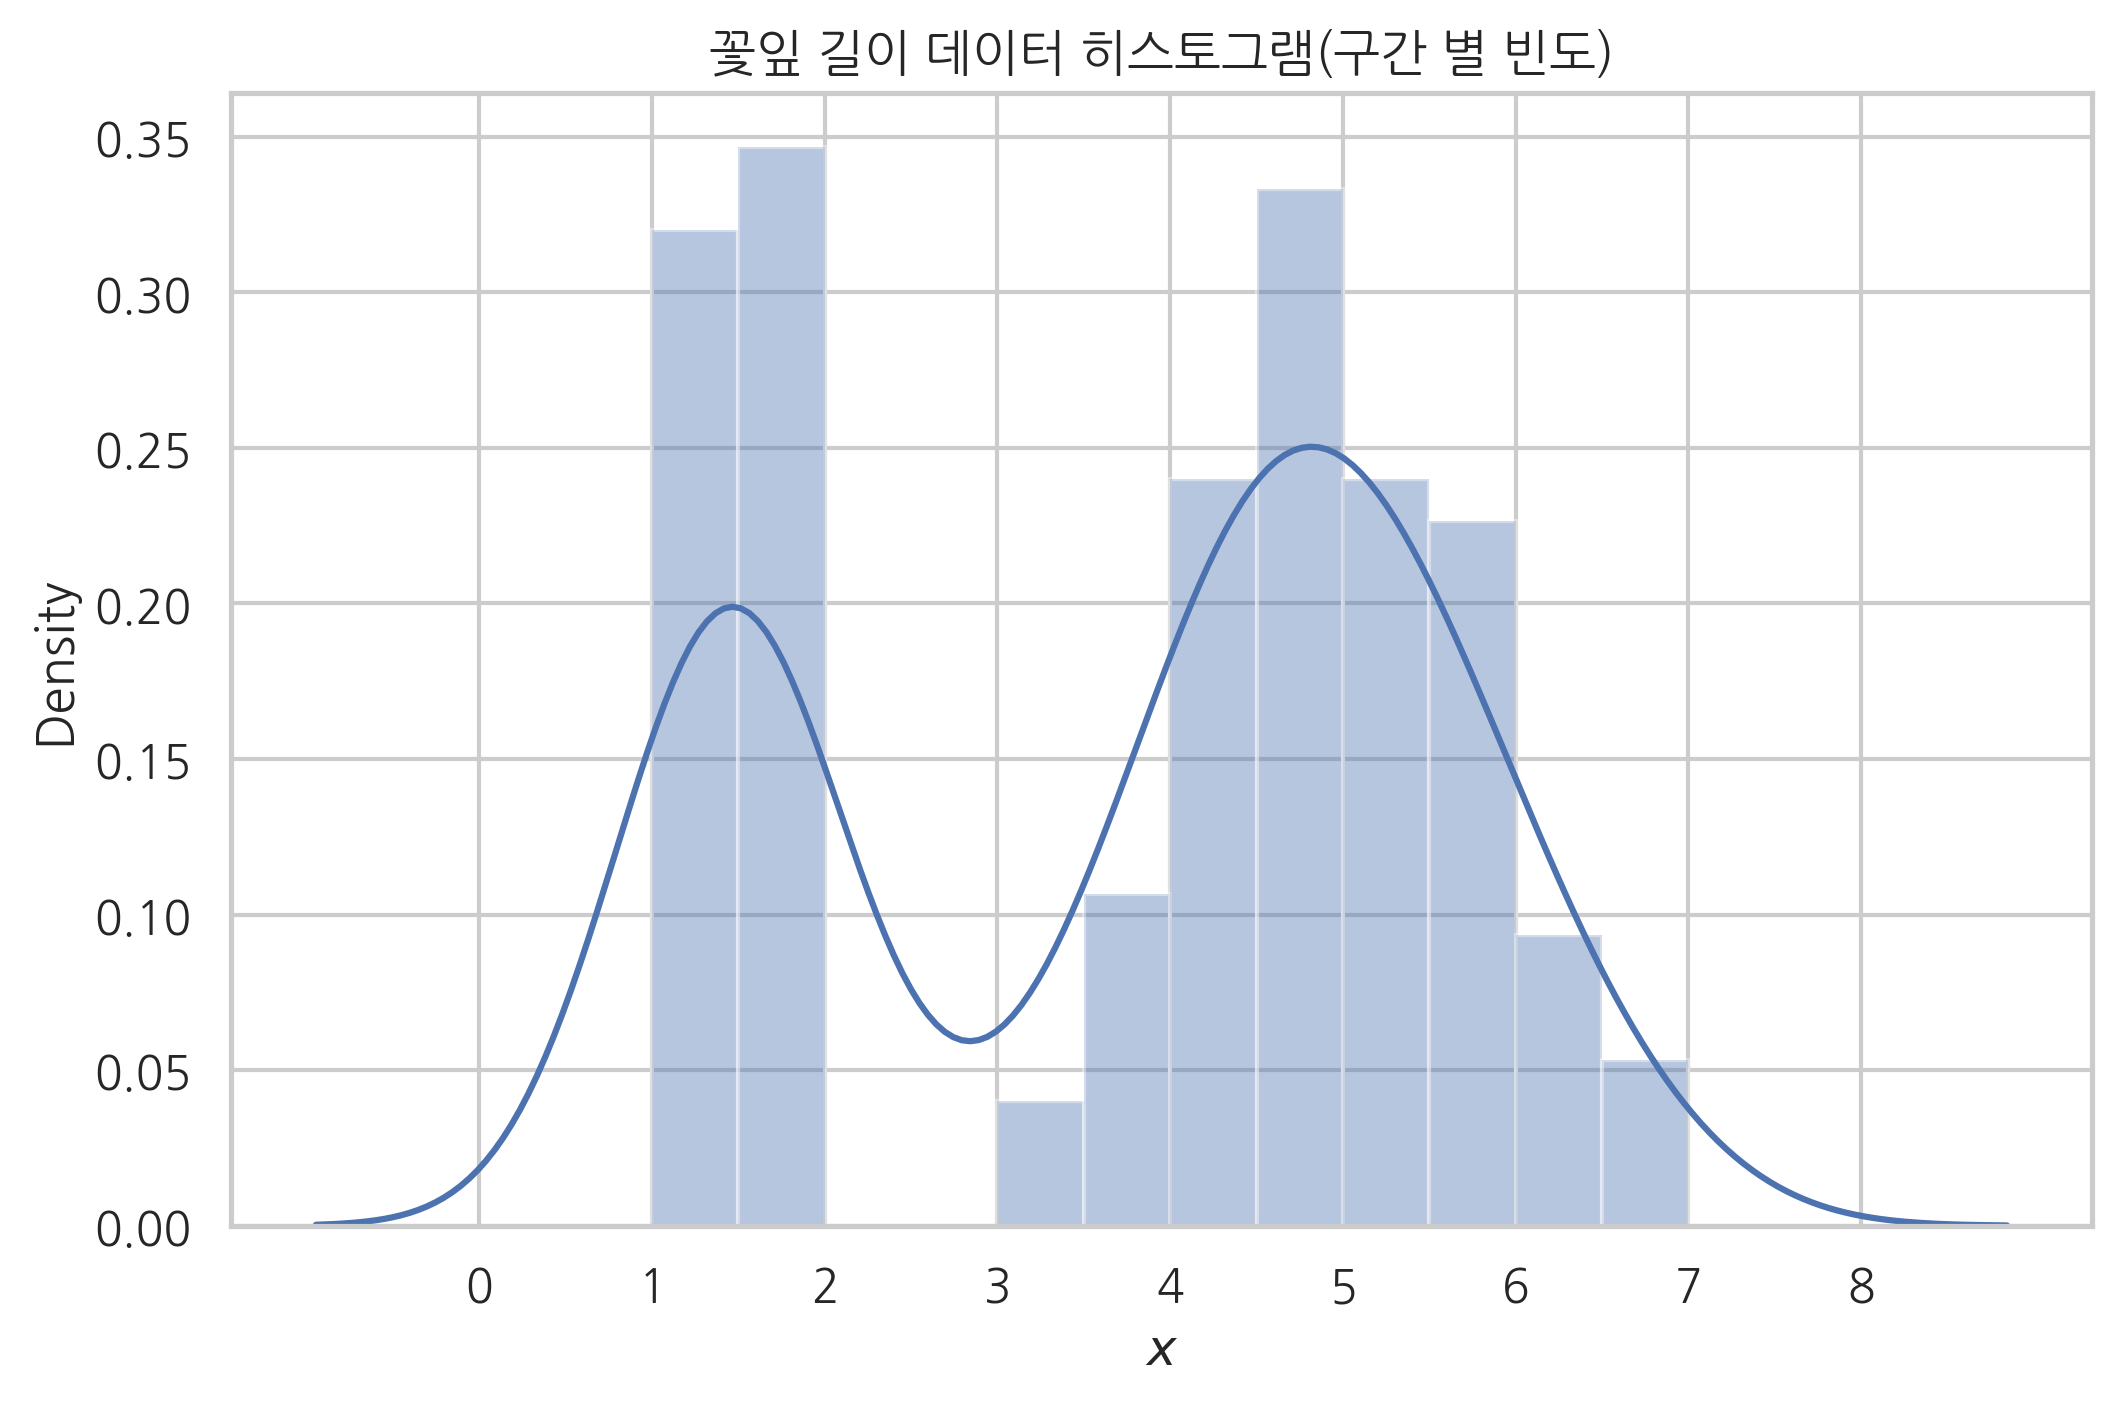

In [145]:
xx = np.linspace(0, 8, 17) # 0.5 간격으로 0에서 8까지 나눈 구간들 (간격 0.5)
sns.distplot(pl.values, xx)
plt.xticks(np.arange(0,9))
plt.xlabel('$x$')
plt.title('꽃잎 길이 데이터 히스토그램(구간 별 빈도)')
plt.show()

# 1. 꽃잎 길이 분포는 다봉분포(봉우리 2개 이상)이다. 

In [170]:
#2. 
p2 = df[['petal length (cm)', 'species']]
ps = p2[p2['species']=='setosa']
ps.head()

,petal length (cm),species
0,1.4,setosa
1,1.4,setosa
2,1.3,setosa
3,1.5,setosa
4,1.4,setosa


In [177]:
ps_value = ps['petal length (cm)'].values
print(f'최솟값 : {min(ps_value)}, 최댓값 : {max(ps_value)}')

최솟값 : 1.0, 최댓값 : 1.9


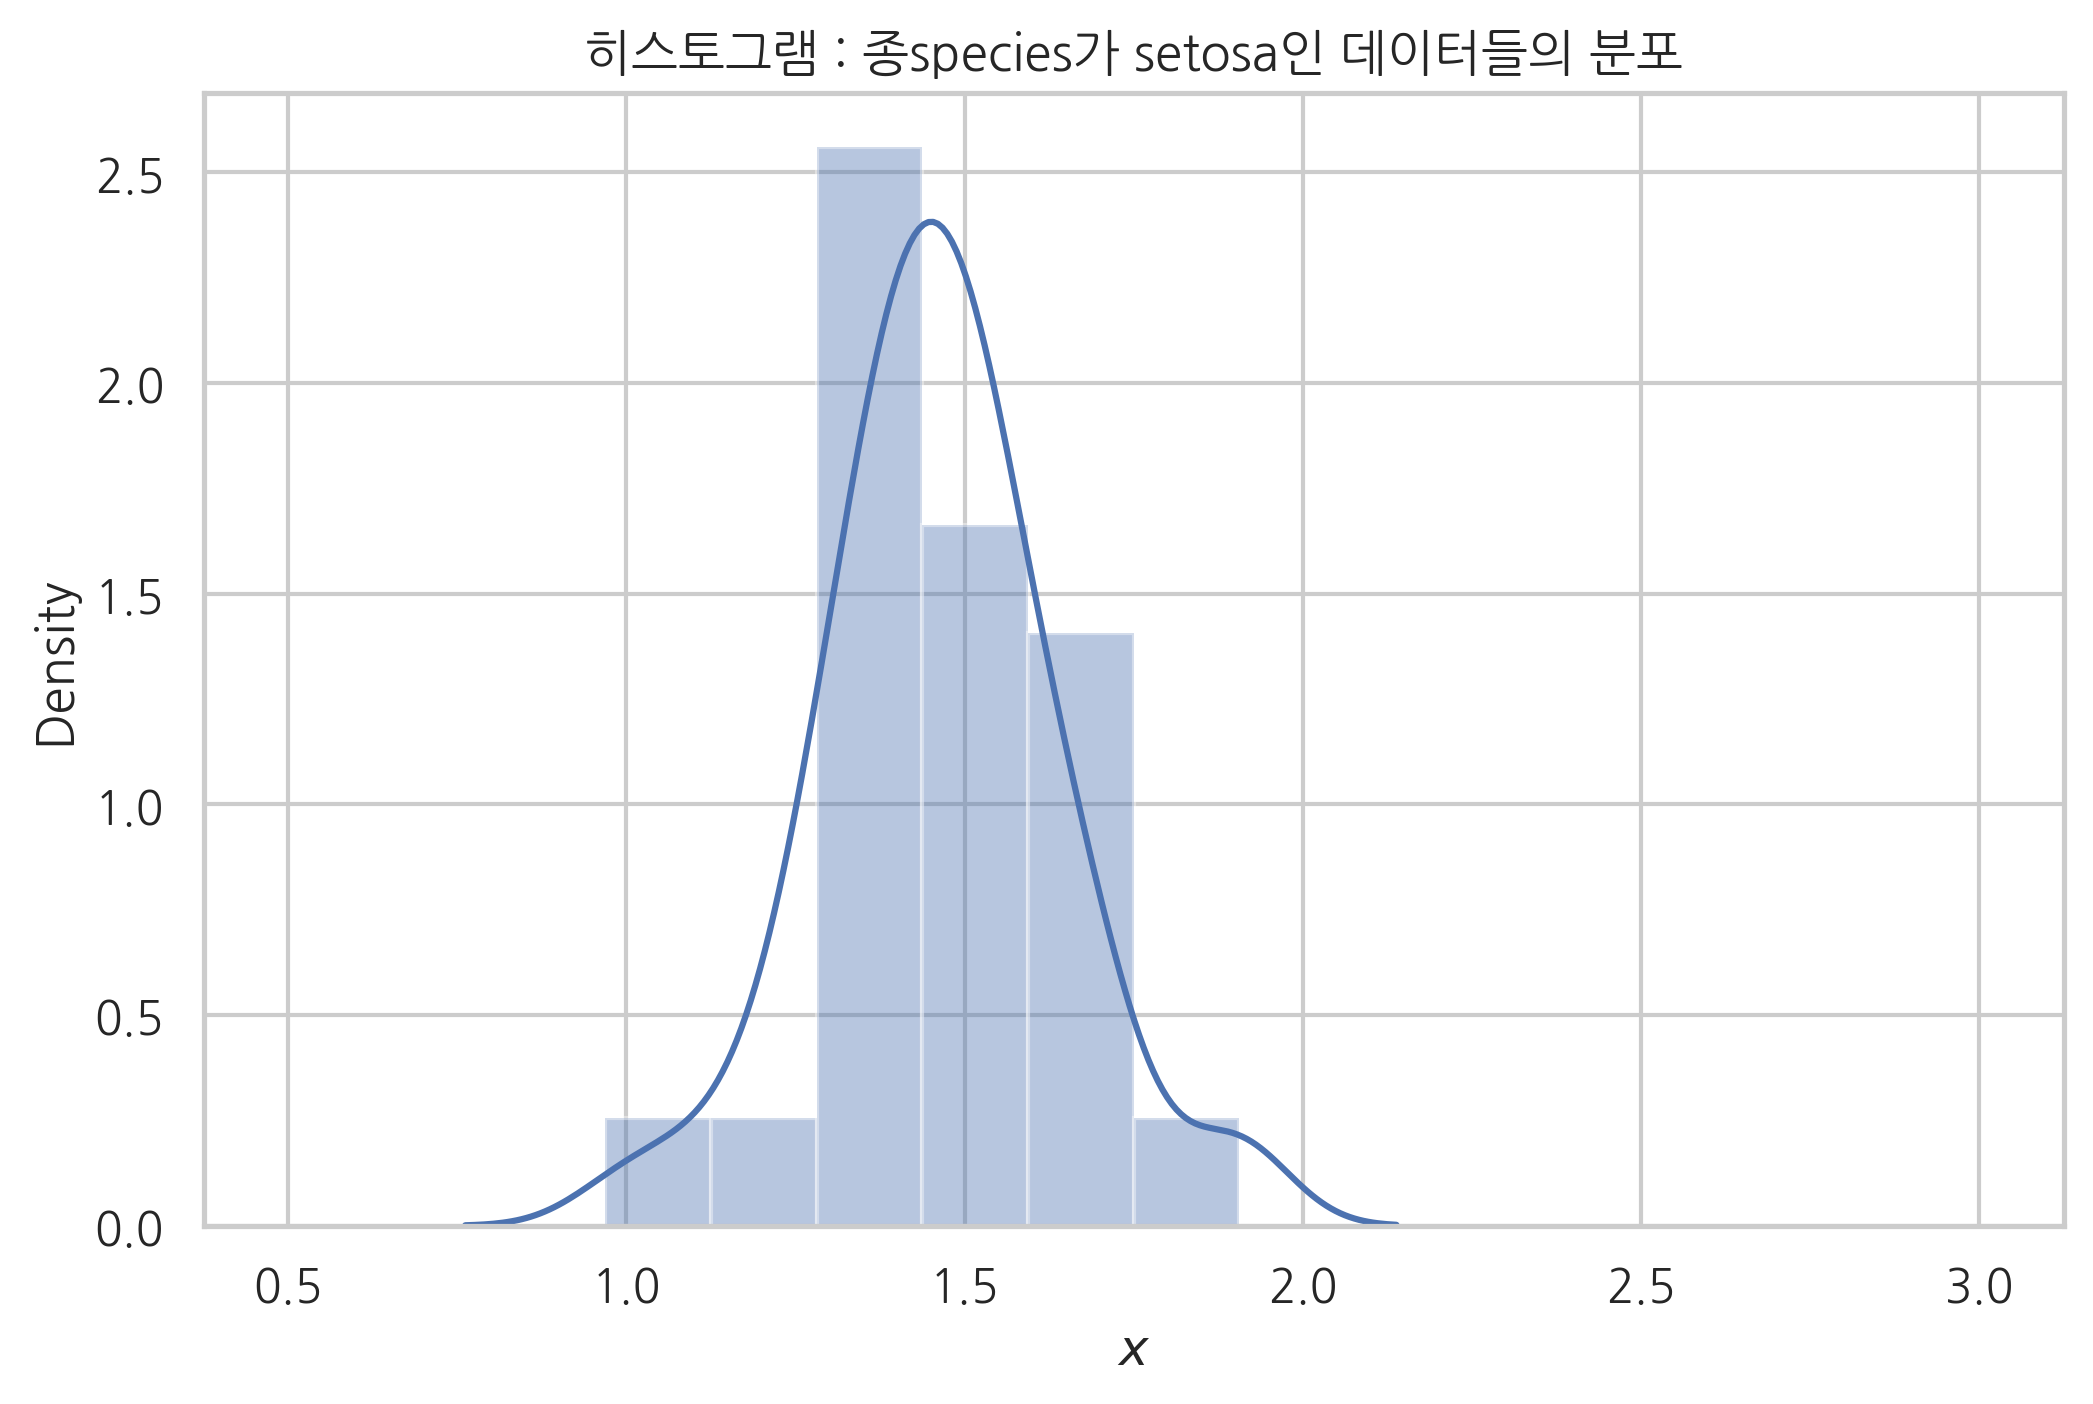

In [189]:
xx2 = np.linspace(0.5, 3, 17)
sns.distplot(ps_value, xx2)
plt.xlabel('$x$')
plt.title('히스토그램 : 종species가 setosa인 데이터들의 분포')
plt.show()

# 2. 위 분포는 단봉분포이다.

In [217]:
np.random.seed(1) # 난수 고정
x = np.random.normal(size = 1000) # 난수 1000개 생성 
x = np.hstack([x, 5*np.ones(50)]) # 수평 방향으로 두 벡터 붙인다 # 분포의 대칭성 깨는 데이터 추가됨. 

In [261]:
print(f'표본평균 : {np.mean(x2)}')
print(f'표본중앙값 : {np.median(x2)}')
print()

표본평균 : 0.023510765251528933
표본중앙값 : 0.0034570583201230668


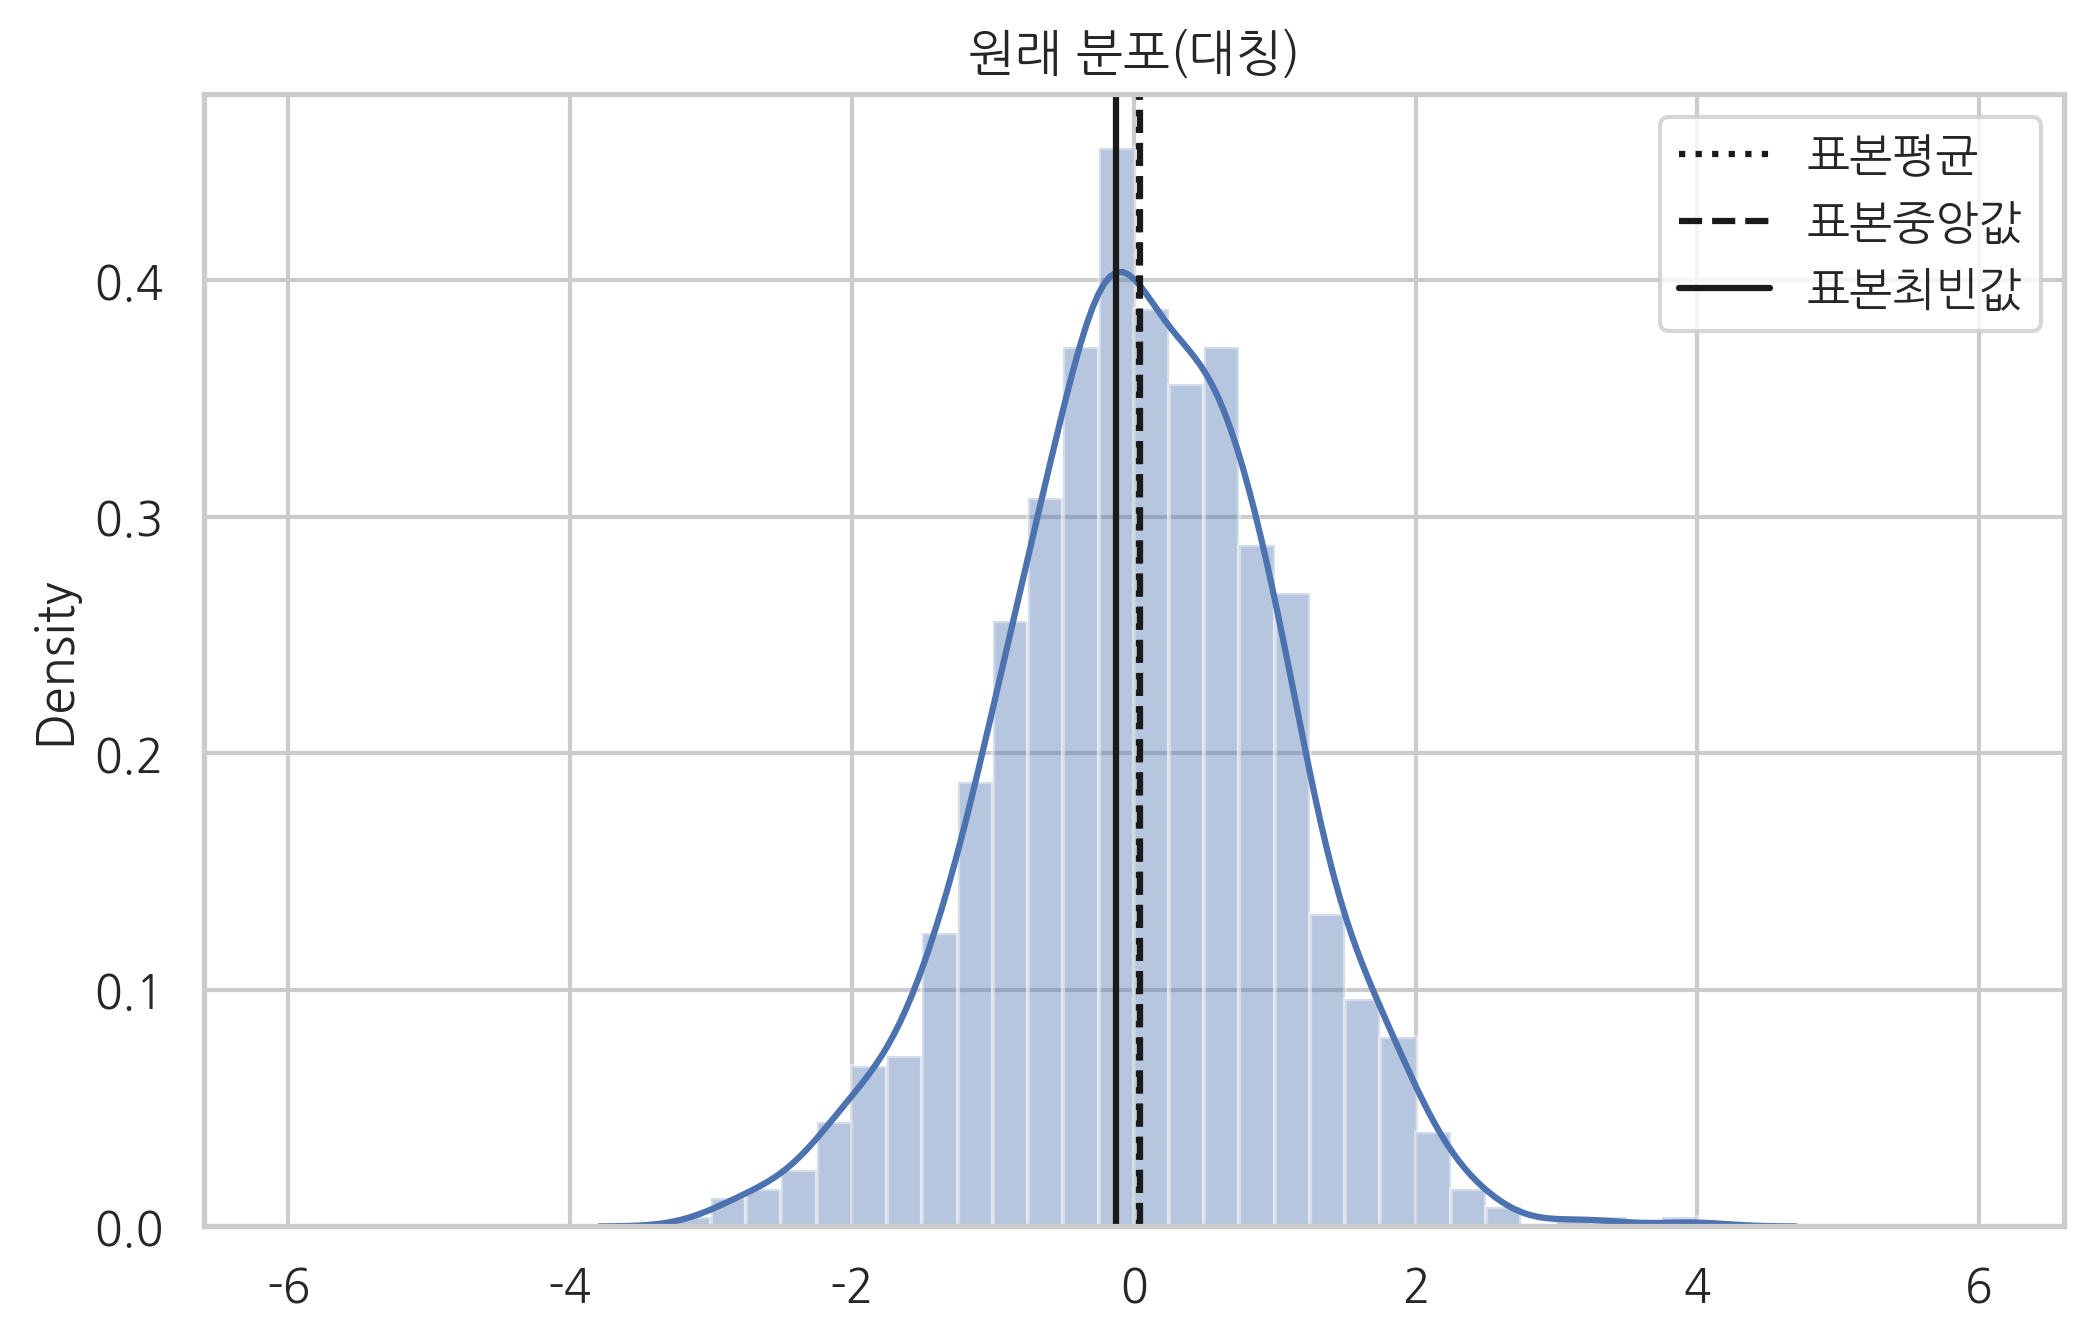

In [311]:
np.random.seed(1)
x2 = np.random.normal(size=1000)

sns.distplot(x2, bins=bins)
plt.axvline(np.mean(x2), c='k', ls=':', label='표본평균')
plt.axvline(np.median(x2), c='k', ls='--', label='표본중앙값')
ns, _ = np.histogram(x2, bins=bins)
md_index = np.argmax(ns)
sm_mode = (bins[md_index]+bins[md_index+1])*0.5
plt.axvline(sm_mode, c='k', ls='-', label='표본최빈값') # 구간의 평균(대푯값)

plt.legend()
plt.title('원래 분포(대칭)')
plt.show()


# 대칭분포 : 표본평균=표본중앙값=표본최빈값

# 분포 대칭 깨지는 경우 : 

In [276]:
# 분포 대칭 깨는 데이터 추가해보자. 
np.random.seed(1)
x = np.random.normal(size=1000)
x = np.hstack([x, 5*np.ones(50)])
bins = np.linspace(-6,6,12*4+1)
ns, _ = np.histogram(x, bins=bins) # 구간 별 데이터 갯수 세라
print(_)
print(ns)

[-6.   -5.75 -5.5  -5.25 -5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25
 -3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25
  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.  ]
[  0   0   0   0   0   0   0   0   0   0   0   1   3   4   6  11  17  18
  31  47  64  77  93 114  97  89  93  72  67  33  24  20  10   4   2   0
   1   1   0   1   0   0   0   0  50   0   0   0]


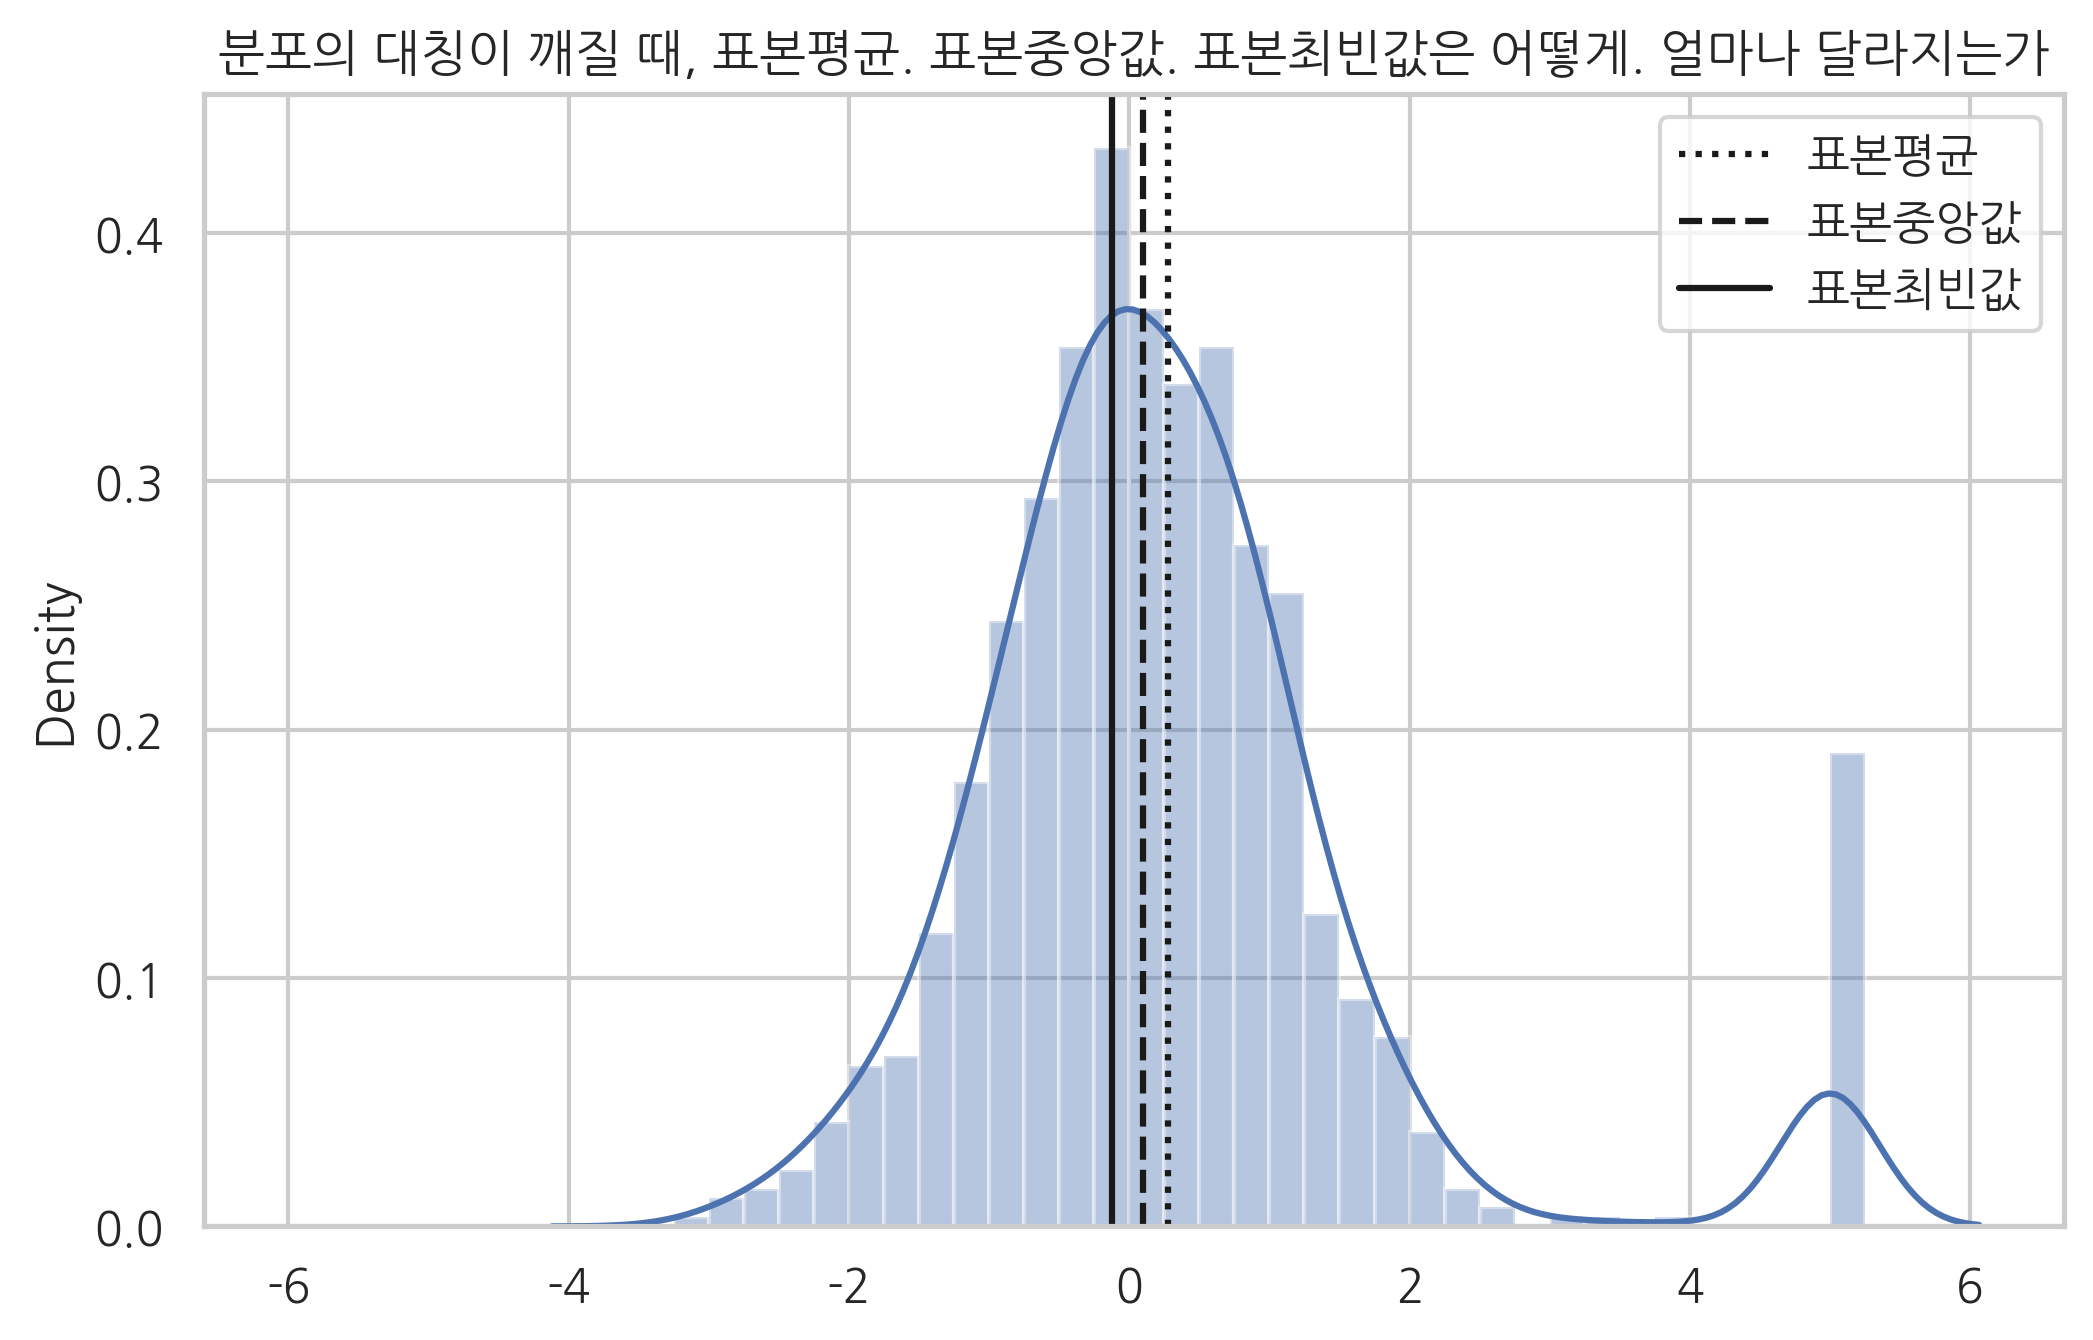

In [281]:
sample_mean = np.mean(x) # 균형 깨졌을 때 표본평균
sample_median = np.median(x) # 균형 깨졌을 때 표본 중앙값
mode_index = np.argmax(ns) # 데이터 수 가장 큰 구간 데이터 수 인덱스 
sample_mode = 0.5*(bins[mode_index]+bins[mode_index+1])

sns.distplot(x, bins=bins)
plt.axvline(sample_mean, c='k', ls=':',label='표본평균')
plt.axvline(sample_median, c='k', ls='--', label='표본중앙값')
plt.axvline(sample_mode, c='k',ls='-', label='표본최빈값')
plt.legend()
plt.title('분포의 대칭이 깨질 때, 표본평균. 표본중앙값. 표본최빈값은 어떻게. 얼마나 달라지는가')
plt.show()

# 표본최빈값 : 변화없음 (가장 적게 영향 받음)
# 표본중앙값 : 약간 영향 받음
# 표본평균 : 가장 많이 영향 받아서 변함 

# 연습문제 풀면서 다시 이해해보자. 

In [324]:
# 7.1.2 연습문제 
#1. 
from sklearn.datasets import load_iris
iris = load_iris()

df2 = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype='category')
sy = sy.cat.rename_categories(iris.target_names)
df2['species'] = sy
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [339]:
df_v = df2[df2['species']=='virginica']
df_v.head()
df_v.reset_index(drop=True, inplace=True)
df_v = df_v[['petal length (cm)']]
df_v.values

array([[6. ],
       [5.1],
       [5.9],
       [5.6],
       [5.8],
       [6.6],
       [4.5],
       [6.3],
       [5.8],
       [6.1],
       [5.1],
       [5.3],
       [5.5],
       [5. ],
       [5.1],
       [5.3],
       [5.5],
       [6.7],
       [6.9],
       [5. ],
       [5.7],
       [4.9],
       [6.7],
       [4.9],
       [5.7],
       [6. ],
       [4.8],
       [4.9],
       [5.6],
       [5.8],
       [6.1],
       [6.4],
       [5.6],
       [5.1],
       [5.6],
       [6.1],
       [5.6],
       [5.5],
       [4.8],
       [5.4],
       [5.6],
       [5.1],
       [5.1],
       [5.9],
       [5.7],
       [5.2],
       [5. ],
       [5.2],
       [5.4],
       [5.1]])

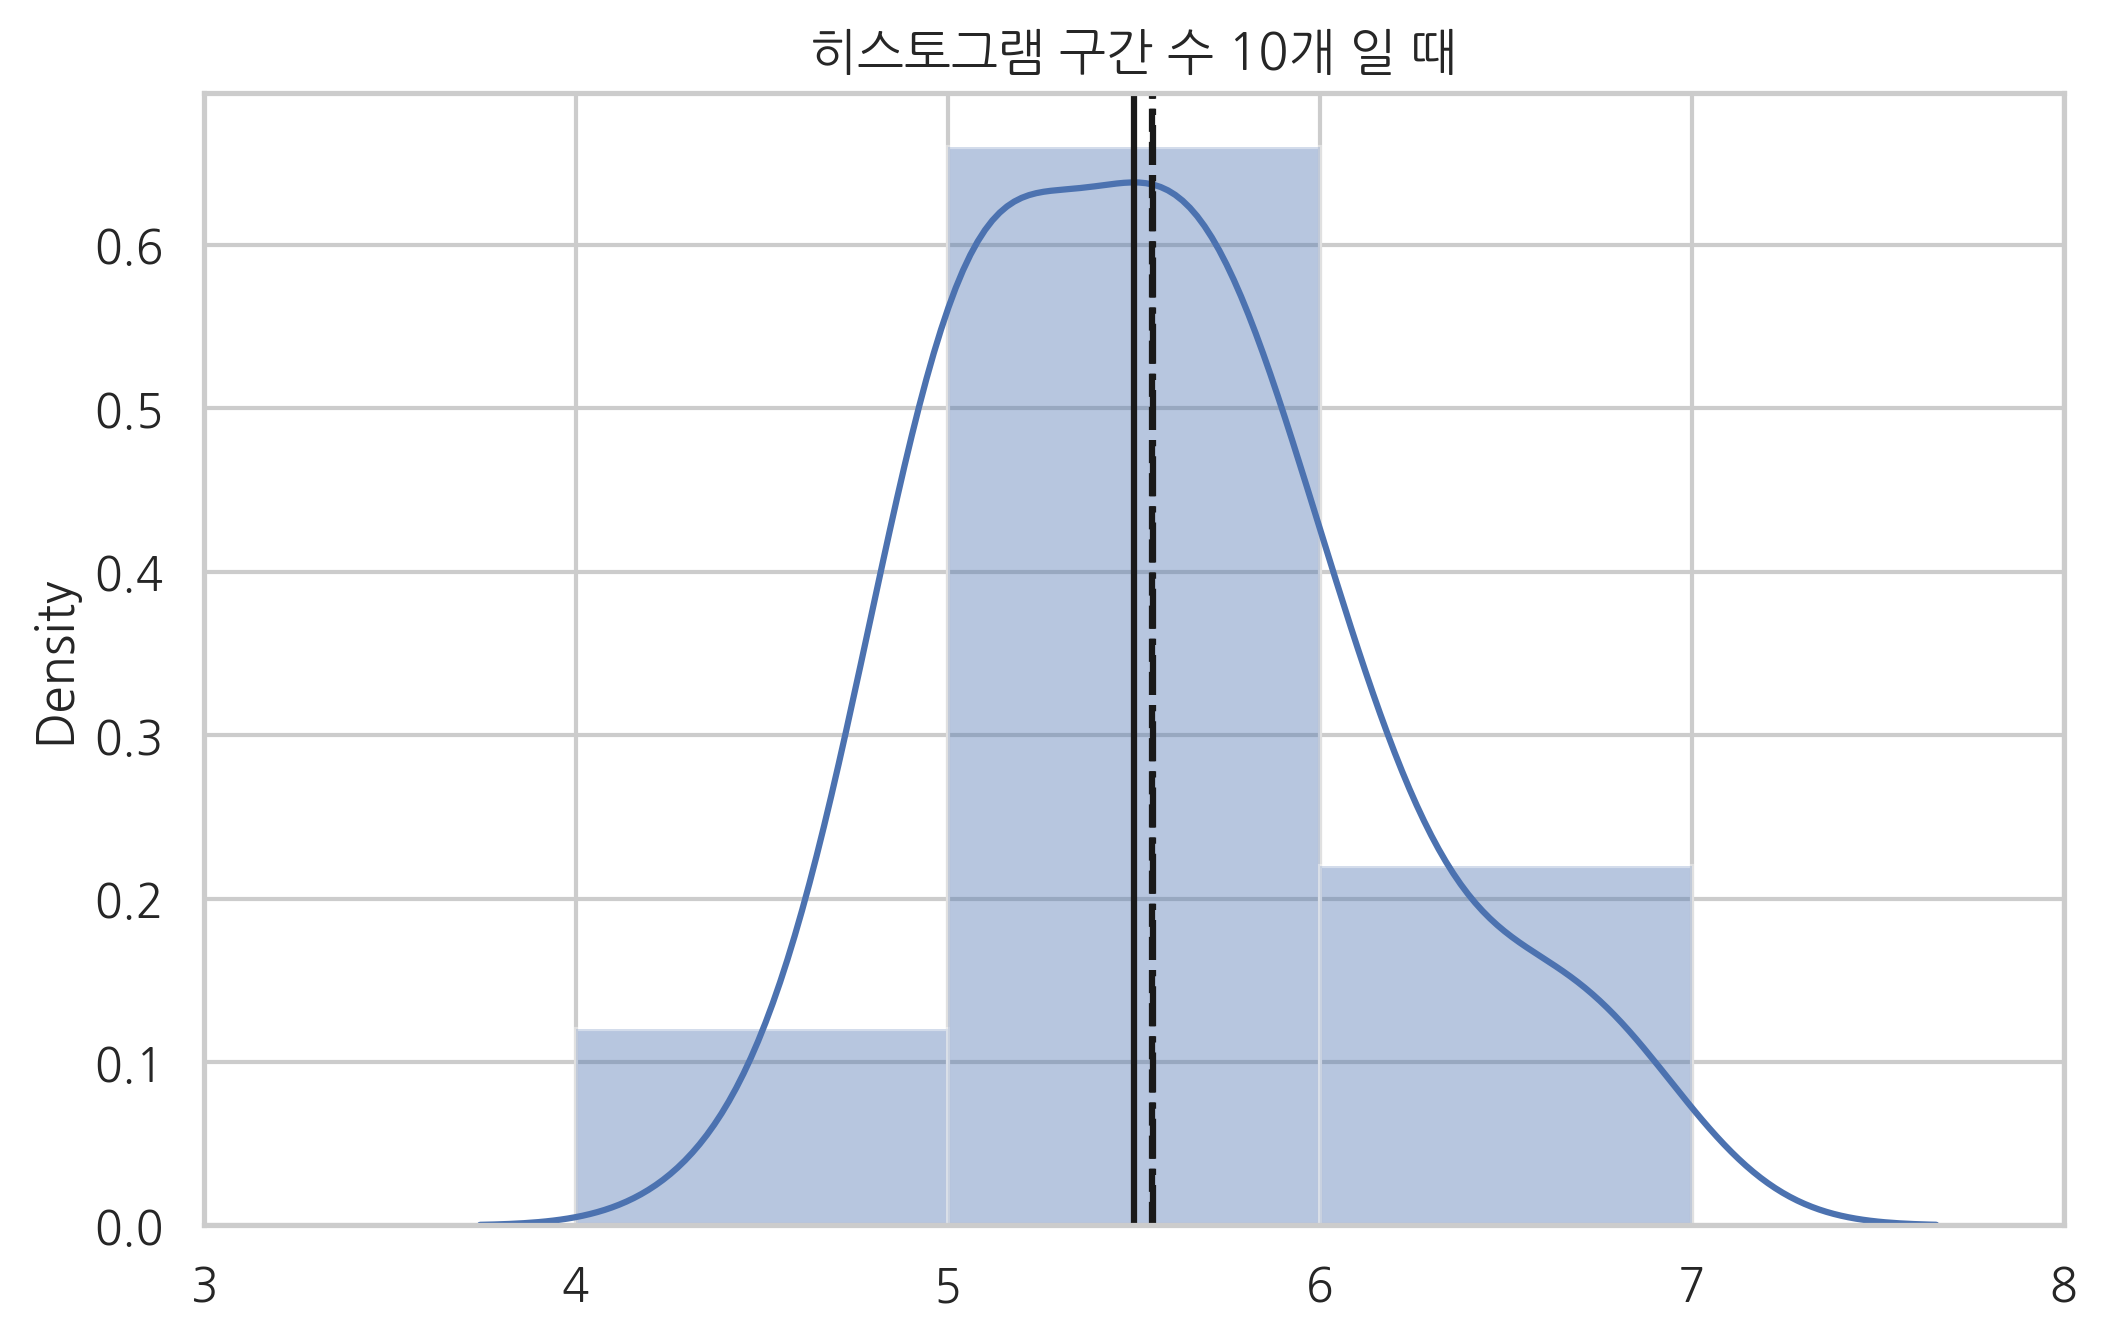

In [416]:
sample_mean = np.mean(df_v.values)
sample_median = np.median(df_v.values)
xx = list(range(0,11))
sns.distplot(df_v.values, xx)
plt.xlim(3,8)

ns, _ = np.histogram(df_v.values, xx)
mod_index = np.argmax(ns)

sample_freq = (xx[mod_index]+xx[mod_index+1])*0.5
plt.axvline(sample_mean, c='k', ls='-.', label='표본평균')
plt.axvline(sample_median, c='k', ls='--', label='표본중앙값')
plt.axvline(sample_freq, c='k', ls='-', label='표본최빈값')
plt.title('히스토그램 구간 수 10개 일 때')

plt.show()

In [368]:
print(f'표본평균 : {sample_mean}')
print(f'표본중앙값 : {sample_median}')
print(f'표본최빈값 : {sample_freq}')

표본평균 : 5.5520000000000005
표본중앙값 : 5.55
표본최빈값 : 5.5


표본최빈값 : 5.5
달라지지 않았다


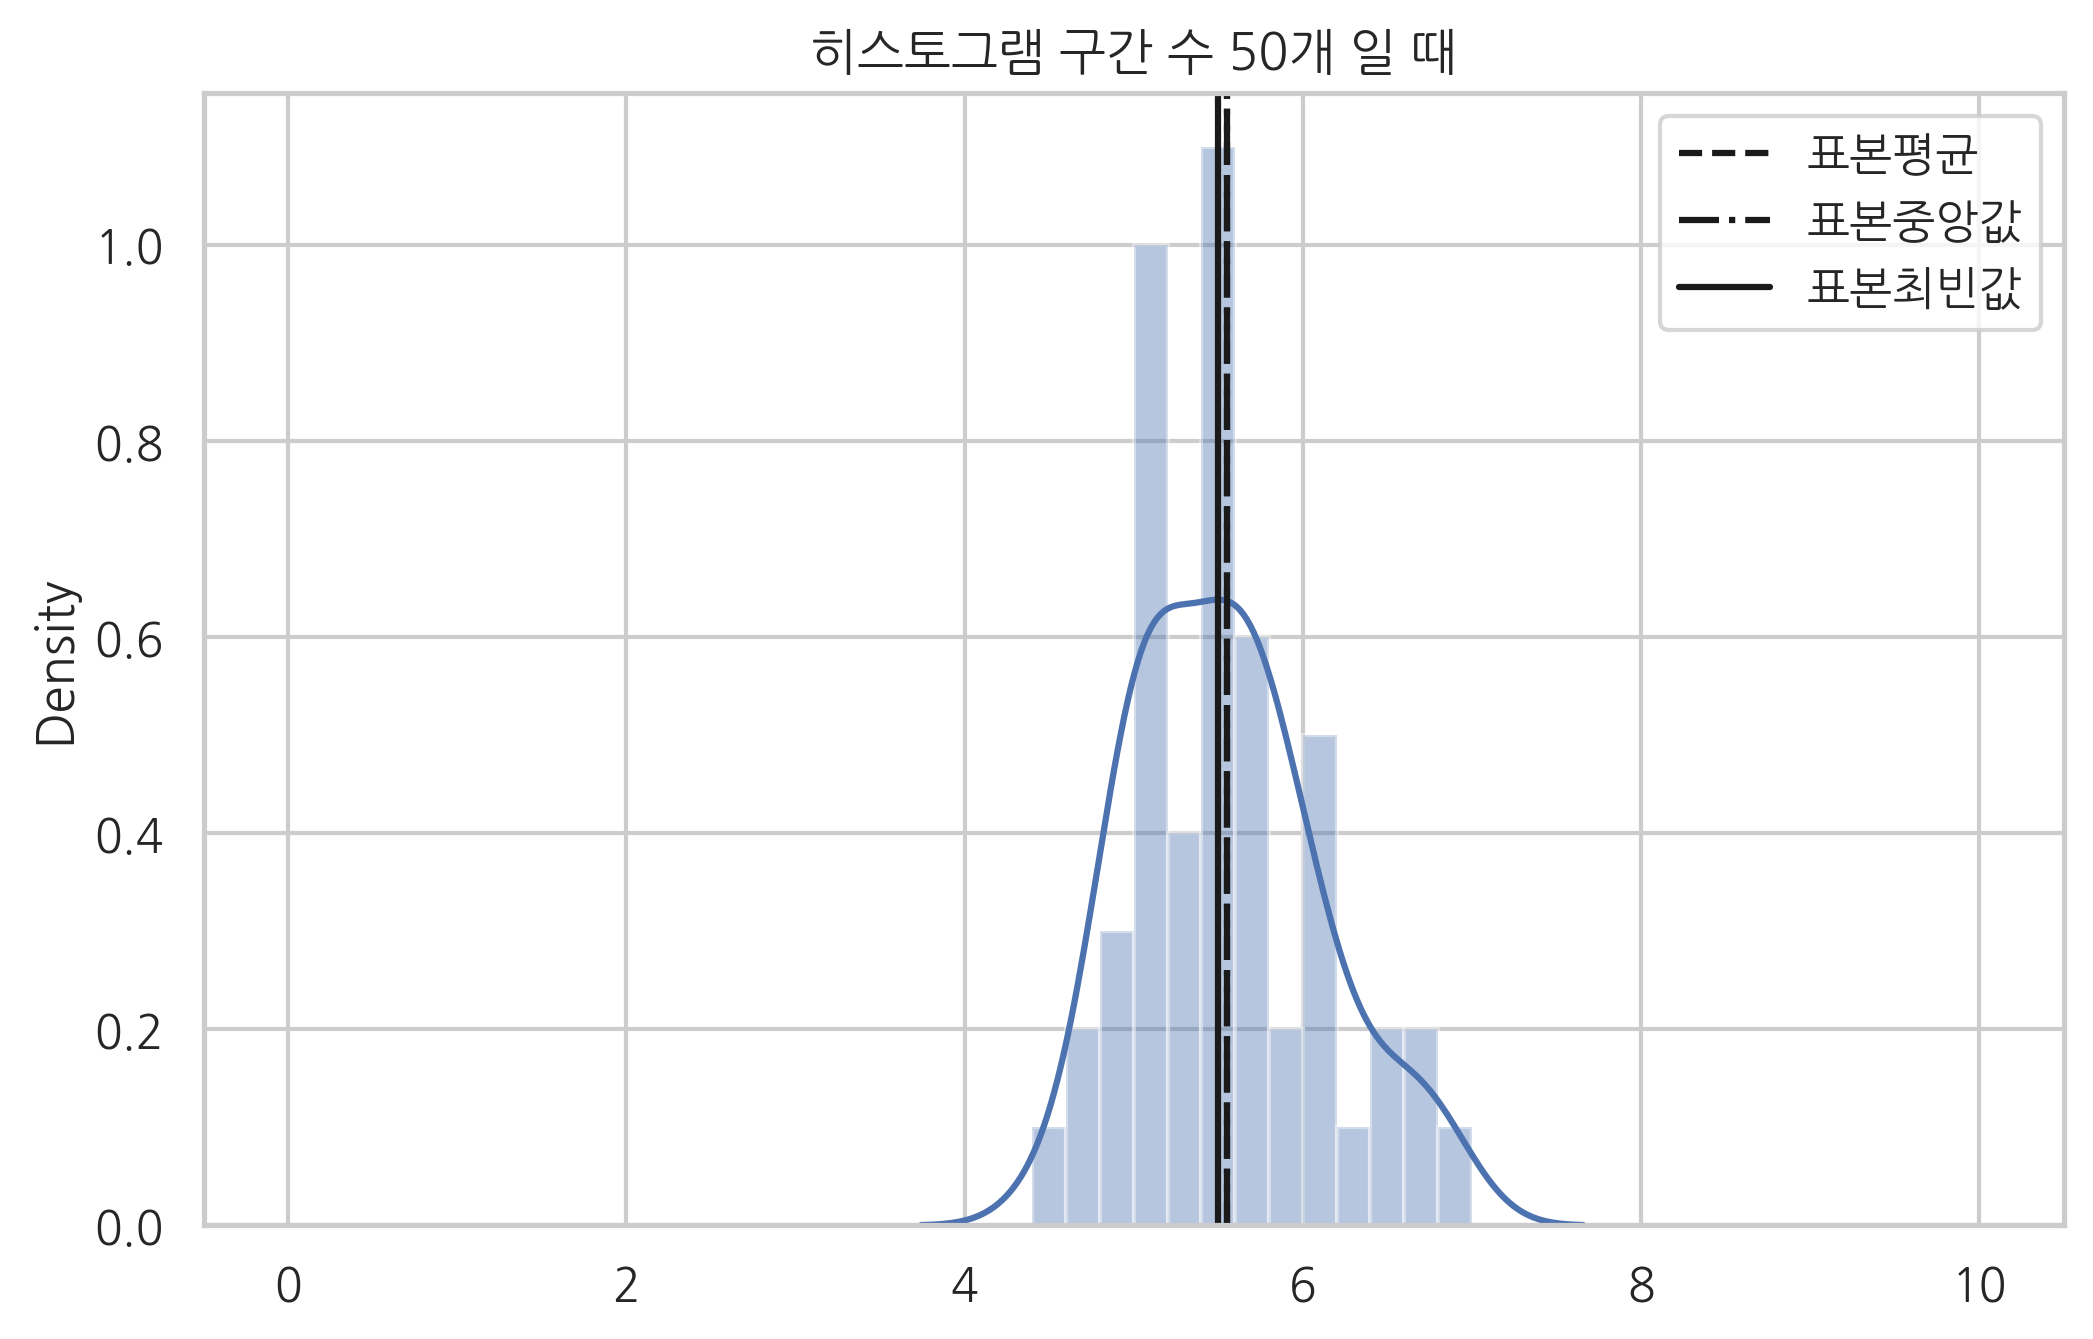

In [423]:
#2. 히스토그램 구간 수를 늘려서 다시 표본최빈값 구해보자. 
xx2 = np.linspace(0,10,51)
sns.distplot(df_v.values, xx2)
ns, _ = np.histogram(df_v.values, xx2) # 구간 별 데이터 수
print(f'표본최빈값 : {(xx2[np.argmax(ns)]+xx2[np.argmax(ns)+1])*0.5}')
print('달라지지 않았다')
plt.title('히스토그램 구간 수 50개 일 때')
plt.axvline(np.mean(df_v.values), c='k', ls='--', label='표본평균')
plt.axvline(np.median(df_v.values), c='k', ls='-.', label='표본중앙값')
plt.axvline((xx2[np.argmax(ns)]+xx2[np.argmax(ns)+1])*0.5, c='k', ls='-',label='표본최빈값')
plt.legend()
plt.show()

표본최빈값 구간 갯수 100일 때 : 5.050000000000001


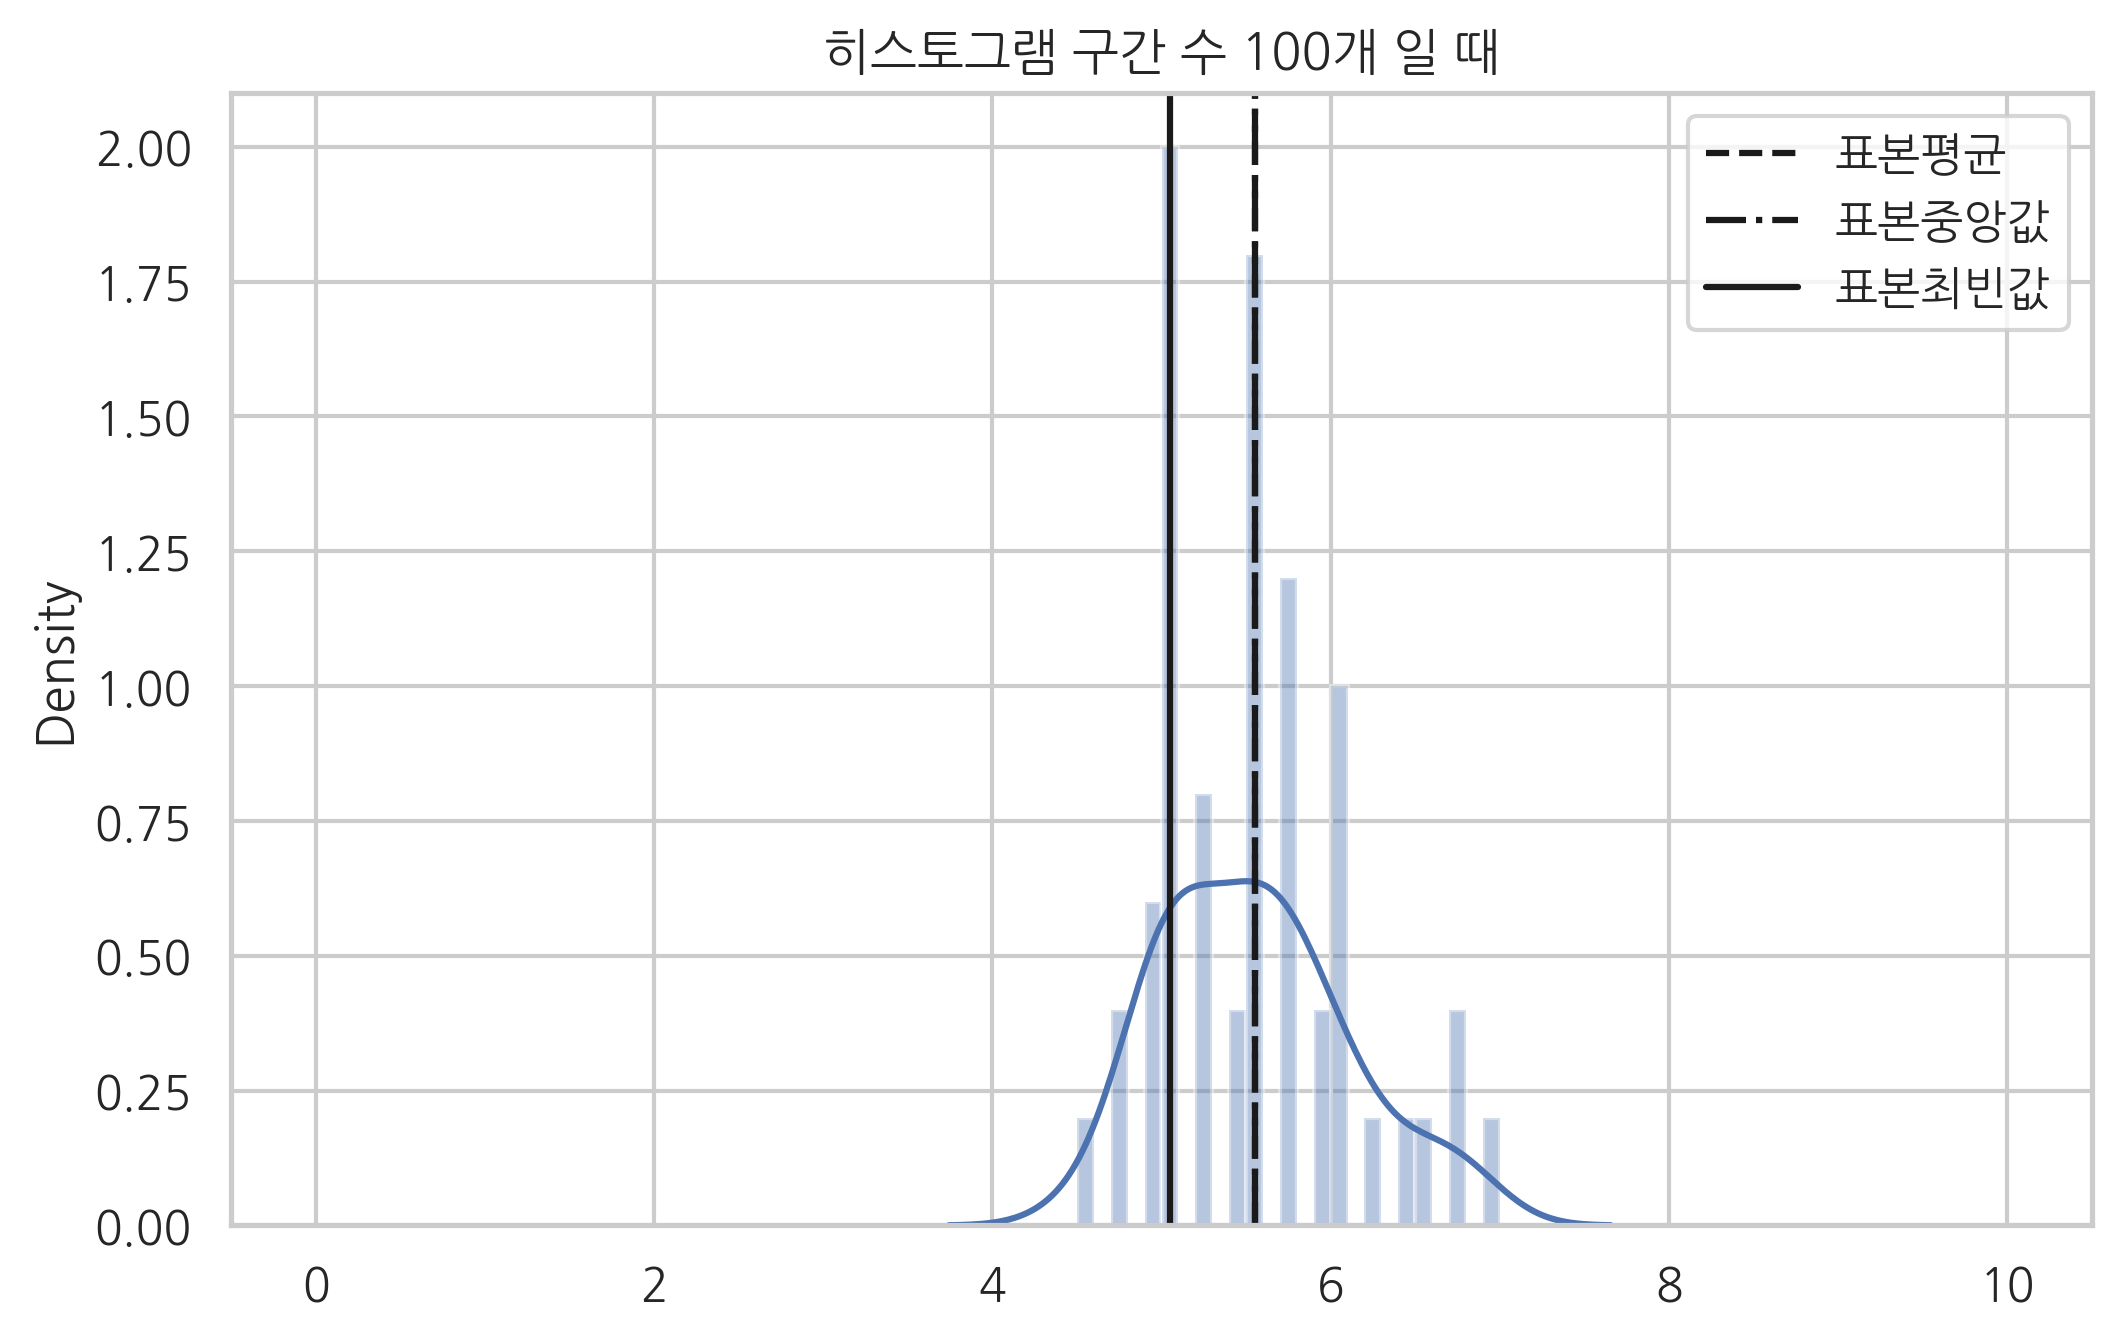

In [425]:
xx3 = np.linspace(0,10,101)
sns.distplot(df_v.values, xx3)
ns, _ = np.histogram(df_v.values, xx3)

plt.axvline(np.mean(df_v.values), c='k', ls='--', label='표본평균')
plt.axvline(np.median(df_v.values), c='k', ls='-.', label='표본중앙값')
plt.axvline((xx3[np.argmax(ns)]+xx3[np.argmax(ns)+1])*0.5, c='k', ls='-',label='표본최빈값')

print(f'표본최빈값 구간 갯수 100일 때 : {(xx3[np.argmax(ns)]+xx3[np.argmax(ns)+1])*0.5}')
plt.legend()
plt.title('히스토그램 구간 수 100개 일 때')
plt.show()

# 표본분산, 표본표준편차 파이썬으로 구현하기 

In [428]:
import scipy as sp
sp.random.seed(0)
x = sp.stats.norm(0,2).rvs(1000) # 평균이 0, 표준편차가 2인 정규분포 

편향 표본분산, 편향 표본표준편차 

In [429]:
np.var(x), np.std(x)

(3.896937825248617, 1.9740663173380515)

- ddof 인수 : 인수에 넣는 값 (예: ddof='1') 만큼 n-인수 해서 계산한다. (n-1)
- 비편향 표본분산은 n-1 이므로 ddof=1 주면 계산할 수 있다. 

In [439]:
np.var(x, ddof=1),np.std(x, ddof=1)

(3.900838663912529, 1.9750540913890255)

In [466]:
# 7.1.3 연습문제 
import pandas_datareader.data as web

df = web.DataReader('DJCA', data_source='fred').dropna()['DJCA']
r = np.log(df/df.shift(1)).dropna().values # 다우지수 일간수익률 데이터 
r

array([ 0.00306779,  0.00498017,  0.00054569, ...,  0.002478  ,
        0.00053254, -0.00173286])

In [449]:
#1. 
print(f'다우지수 일간수익률 표본평균 : {np.mean(r)}')
print(f'다우지수 일간수익률 표본분산 : {np.var(r)}')
print(f'다우지수 일간수익률 표본표준편차 : {np.std(r)}')

다우지수 일간수익률 표본평균 : 0.00048799846793165513
다우지수 일간수익률 표본분산 : 0.0001523489866553593
다우지수 일간수익률 표본표준편차 : 0.01234297316919061


In [456]:
#2. 
std = np.std(r)
print(f'연간 변동성 : {(16*std)*100}%')

연간 변동성 : 19.748757070704976%


# 다시해보자. 


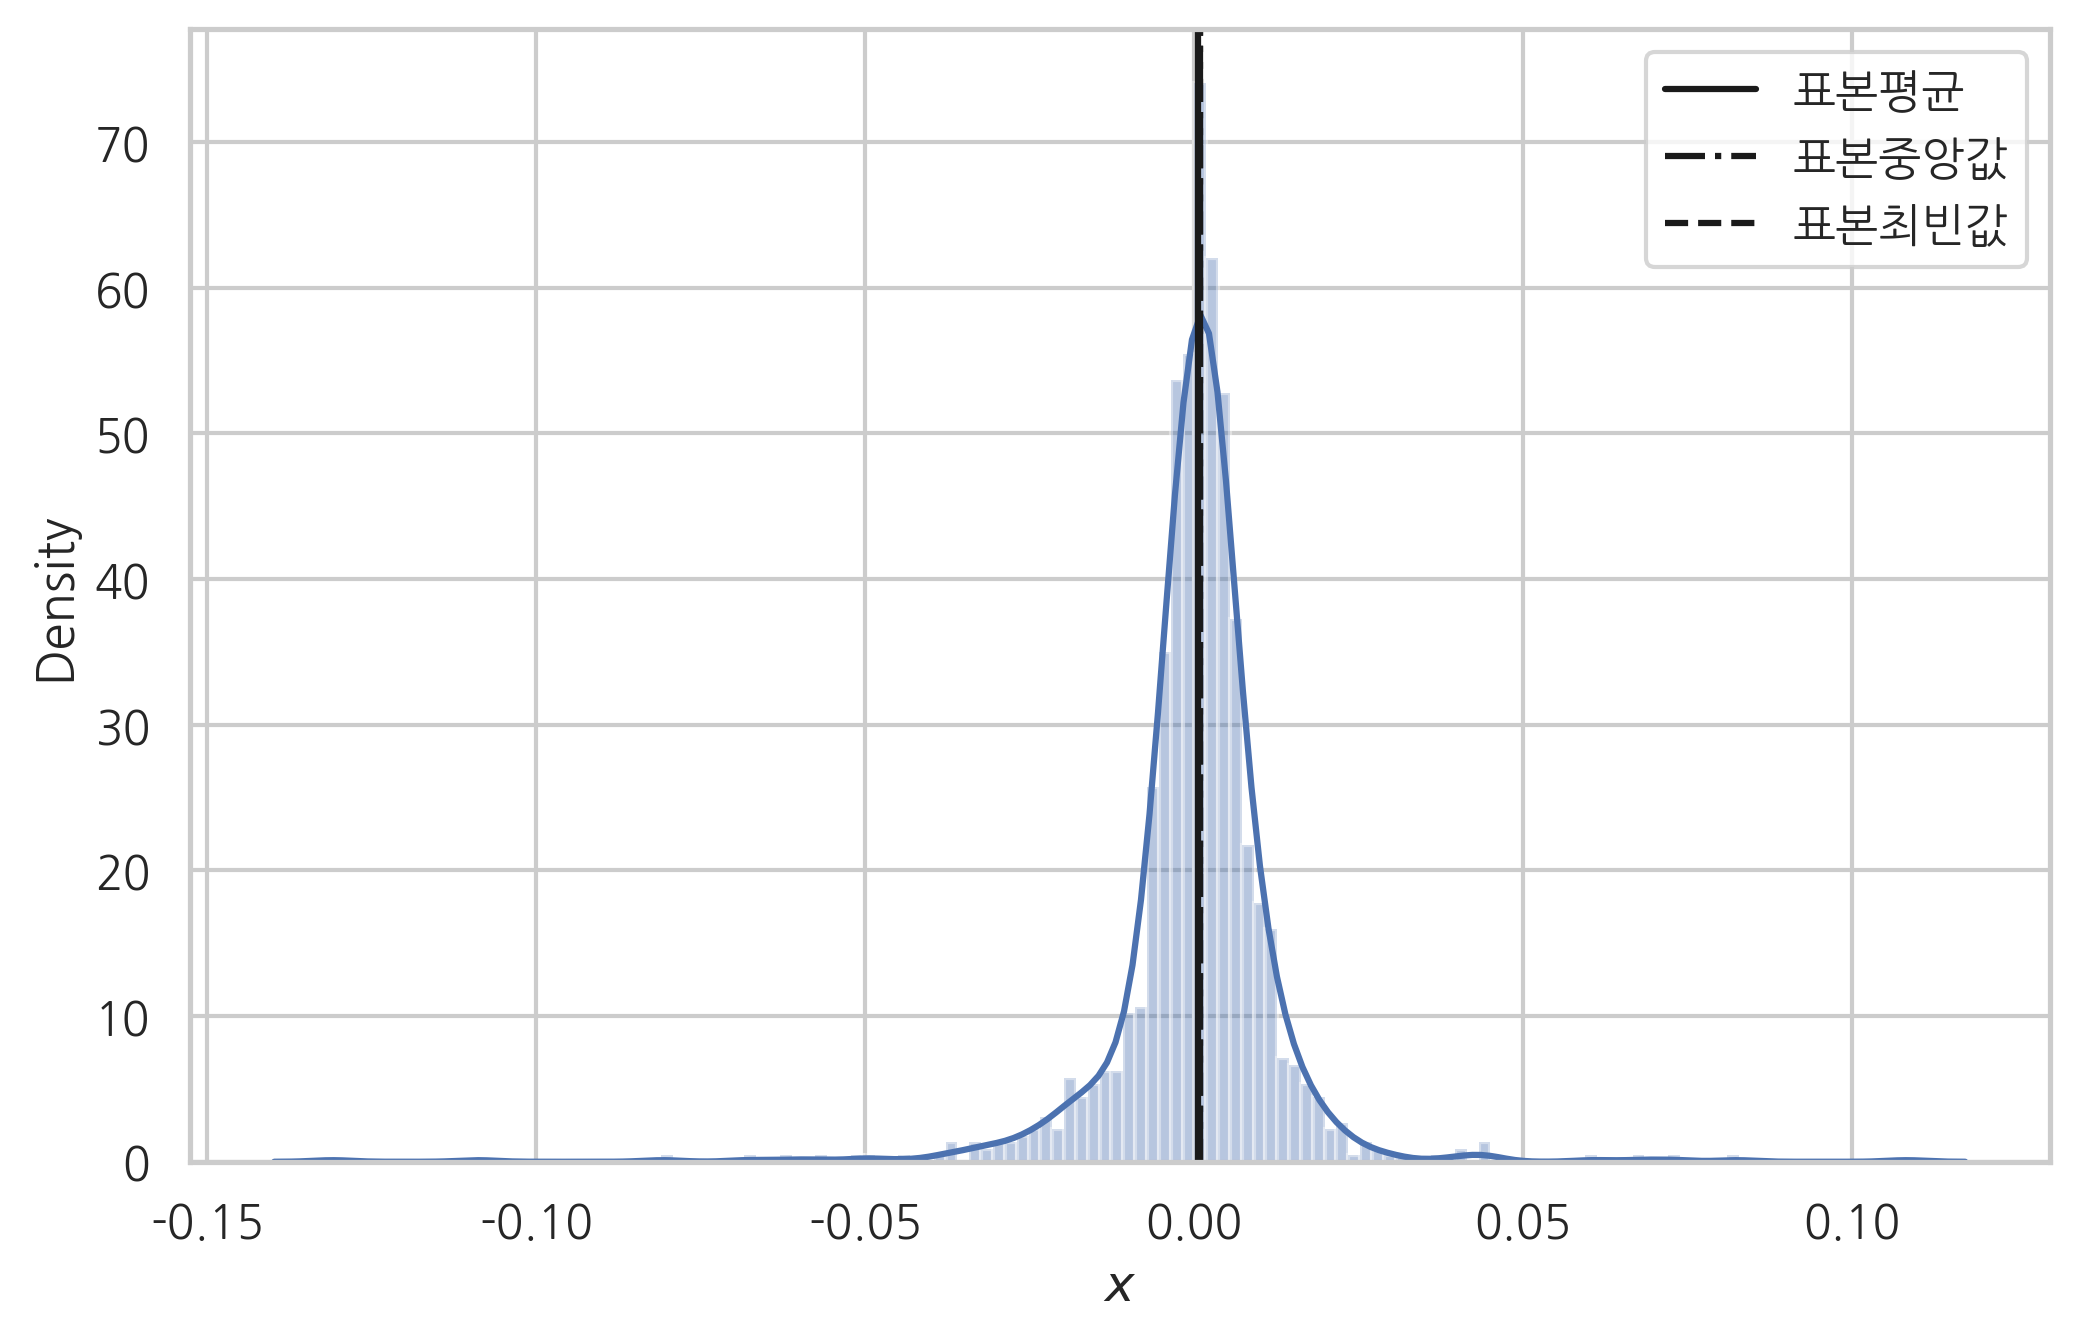

In [507]:
# 표본평균 & 표본중앙값 
sample_mean = np.mean(r)
sample_median = np.median(r)

# 표본최빈값 
xx = np.linspace(-0.09, 0.09, 101)
ns, _ = np.histogram(r, xx)
sample_freq = (xx[np.argmax(ns)]+xx[np.argmax(ns)+1])*0.5

# 히스토그램 시각화하자. 
sns.distplot(r, xx) # 구간 별로 집어넣을 데이터 / 구간 
plt.axvline(sample_mean, c='k', ls='-', label='표본평균')
plt.axvline(sample_median, c='k', ls='-.', label='표본중앙값')
plt.axvline(sample_freq, c='k', ls='--', label='표본최빈값')
plt.xlabel('$x$')
plt.legend()
#plt.xlim(-, 0.004)
plt.show()

# 그래프가 좌우 대칭이다. 
### 표본평균 = 표본중앙값
### 표본평균 = 표본최빈값

In [500]:
print(sample_mean);print(sample_median);print(sample_freq)

0.00048799846793165513
0.0008799925751300611
0.000899999999999998


완벽한 좌우대칭은 아니어서 각 값들에 약간씩 차이가 있는 듯 하다. 

<AxesSubplot:ylabel='Density'>

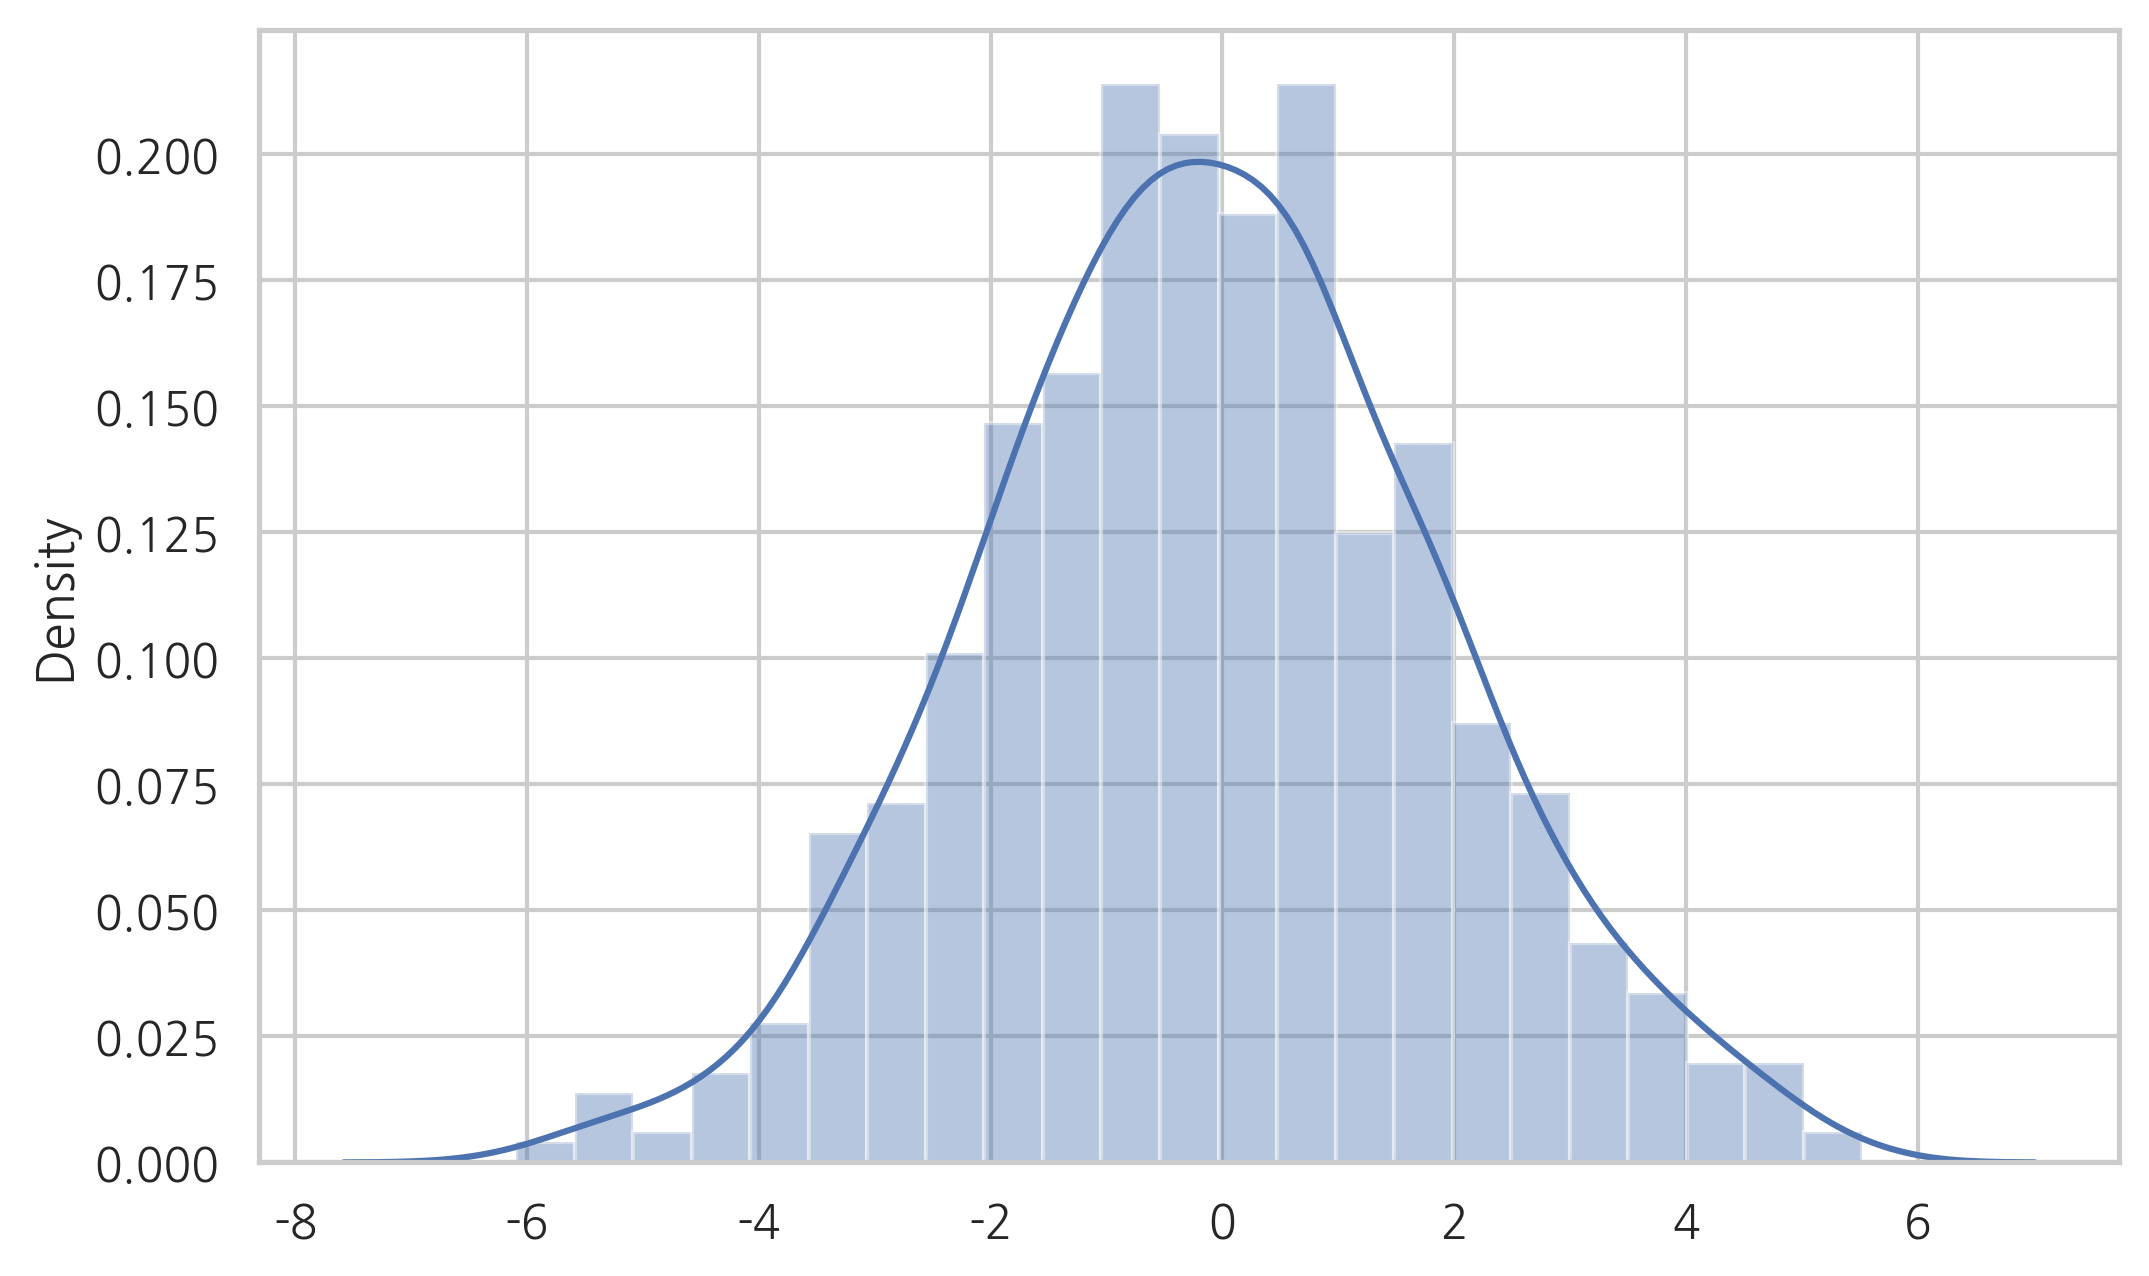

In [514]:
sns.distplot(x, )

In [515]:
# 표본비대칭도 
sp.stats.skew(x)

0.03385895323565712

# 0이 아니다. 비대칭이다. 
# + 양수 이다. 따라서 오른쪽이 좀 더 부푼 비대칭 분포다. 

In [516]:
# 표본첨도
sp.stats.kurtosis(x)

-0.0467663244783294

# 음수다. 
# 정규분포보다 평균에서 좀 더 떨어져 있다. 

# 표본모멘트 

In [525]:
sp.stats.moment(x,1),sp.stats.moment(x,2),sp.stats.moment(x,3),sp.stats.moment(x,4)

(0.0, 3.896937825248617, 0.2604706193725514, 44.84817401965371)

# 기본 알고리듬으로 '표본중앙모멘트(각 표본서 평균 빼줌)' 쓴다.
# $1/N\sum^{N}_{i=1}(x_{i}-\bar x)^{k}$ <- 표본모멘트 